#EJERCICIO 2:

In [27]:
!pip install -q gdown

In [28]:
import gdown
import zipfile
# TP1-2-Dry-Bean-Dataset.csv
gdown.download('https://drive.google.com/uc?id=1SUwYRZ_6ZWEQQ7FJxniqQCrnHCsBlQcJ')

Downloading...
From: https://drive.google.com/uc?id=1SUwYRZ_6ZWEQQ7FJxniqQCrnHCsBlQcJ
To: /content/TP1-2-Dry-Bean-Dataset.zip
100%|██████████| 1.33M/1.33M [00:00<00:00, 99.5MB/s]


'TP1-2-Dry-Bean-Dataset.zip'

In [29]:
with zipfile.ZipFile('TP1-2-Dry-Bean-Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-2')


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, stats

# Importaciones de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

# Manejo de desequilibrio de clases
from imblearn.over_sampling import RandomOverSampler

# Modelos y métricas de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [31]:
df = pd.read_csv('/content/TP1-2/TP1-2-Dry-Bean-Dataset.csv')
df2 = df.copy()
df2["AspectRatio"] = df2["MajorAxisLength"]/df2["MinorAxisLength"]
df2["Roundness"] = (4 * np.pi * df2["Area"]) / (df2["Perimeter"] ** 2)
df2

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,AspectRatio,Roundness
0,28395,610.291,208.178117,173.888747,0.549812,28715,190.141097,0.763923,0.988856,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,1.197191,0.958027
1,28734,638.018,200.524796,182.734419,0.411785,29172,191.272750,0.783968,0.984986,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,1.097356,0.887034
2,29380,624.110,212.826130,175.931143,0.562727,29690,193.410904,0.778113,0.989559,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,1.209713,0.947849
3,30008,645.884,210.557999,182.516516,0.498616,30724,195.467062,0.782681,0.976696,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,1.153638,0.903936
4,30140,620.134,201.847882,190.279279,0.333680,30417,195.896503,0.773098,0.990893,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,1.060798,0.984877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,0.765002,42508,231.515799,0.714574,0.990331,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,1.552728,0.916603
13607,42101,757.499,281.576392,190.713136,0.735702,42494,231.526798,0.799943,0.990752,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,1.476439,0.922015
13608,42139,759.321,281.539928,191.187979,0.734065,42569,231.631261,0.729932,0.989899,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,1.472582,0.918424
13609,42147,763.779,283.382636,190.275731,0.741055,42667,231.653248,0.705389,0.987813,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,1.489326,0.907906


In [34]:
X = df2.drop(columns=["Class"])
y = df2["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [35]:
X_train.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,AspectRatio,Roundness
count,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000
mean,52955.470914,854.459517,319.808547,202.133124,0.750689,53673.230098,252.849445,0.749533,0.987148,0.800008,0.006568,0.001718,0.643819,0.995082,1.582665,0.873455
std,29235.955002,213.962009,85.583590,44.907263,0.092128,29682.292070,59.097036,0.049066,0.004680,0.061704,0.001130,0.000596,0.099020,0.004360,0.246319,0.059488
min,20420.000000,524.736000,183.601165,122.512653,0.218951,20684.000000,161.243764,0.555315,0.919246,0.645368,0.002778,0.000567,0.416499,0.947687,1.024868,0.489618
25%,36257.000000,702.710000,252.934011,175.560892,0.716214,36655.000000,214.857735,0.718151,0.985686,0.762357,0.005903,0.001155,0.581188,0.993730,1.432910,0.832840
50%,44578.000000,793.896000,296.373810,192.350377,0.764407,45118.000000,238.240367,0.759241,0.988290,0.801330,0.006650,0.001702,0.642129,0.996402,1.551026,0.883263
75%,61206.000000,975.344000,376.024672,216.686769,0.810532,62150.000000,279.159273,0.786852,0.990008,0.834073,0.007281,0.002173,0.695677,0.997887,1.707373,0.917024
max,254616.000000,1985.370000,738.860153,460.198497,0.908167,263261.000000,569.374358,0.866195,0.994677,0.987303,0.010451,0.003665,0.974767,0.999733,2.388873,0.987920


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11569 entries, 10565 to 7270
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             11569 non-null  int64  
 1   Perimeter        11569 non-null  float64
 2   MajorAxisLength  11569 non-null  float64
 3   MinorAxisLength  11569 non-null  float64
 4   Eccentricity     11569 non-null  float64
 5   ConvexArea       11569 non-null  int64  
 6   EquivDiameter    11569 non-null  float64
 7   Extent           11569 non-null  float64
 8   Solidity         11569 non-null  float64
 9   Compactness      11569 non-null  float64
 10  ShapeFactor1     11569 non-null  float64
 11  ShapeFactor2     11569 non-null  float64
 12  ShapeFactor3     11569 non-null  float64
 13  ShapeFactor4     11569 non-null  float64
 14  AspectRatio      11569 non-null  float64
 15  Roundness        11569 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.5 MB


In [38]:
print(f'Cantidad de registros: {df2.shape[0]}')
print(f'Registros con todos los datos presentes: {df2.notnull().all(axis=1).sum()}')

print('Cantidad de registros faltantes para cada variable')
df2.isna().sum()

Cantidad de registros: 13611
Registros con todos los datos presentes: 13611
Cantidad de registros faltantes para cada variable


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
AspectRatio        0
Roundness          0
dtype: int64

Podemos ver que no hay ningun dato faltante

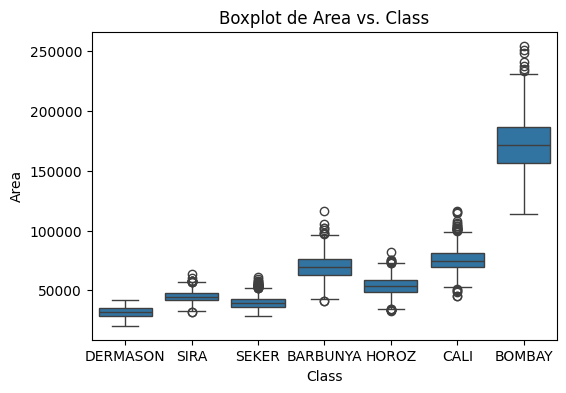

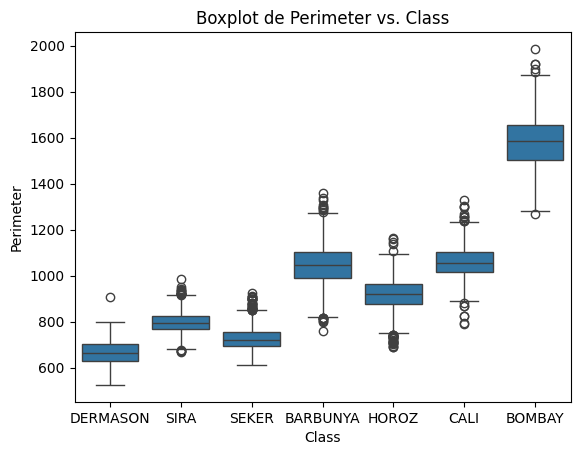

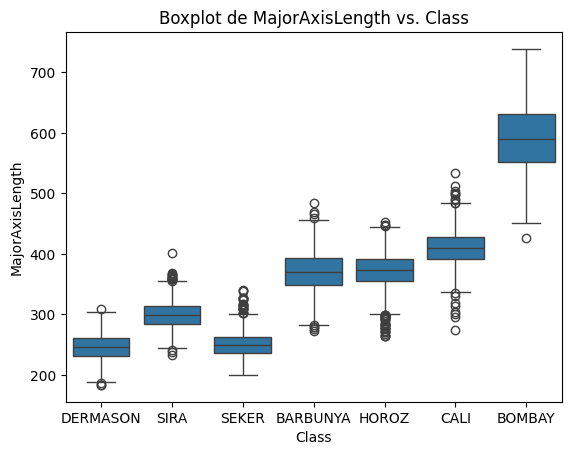

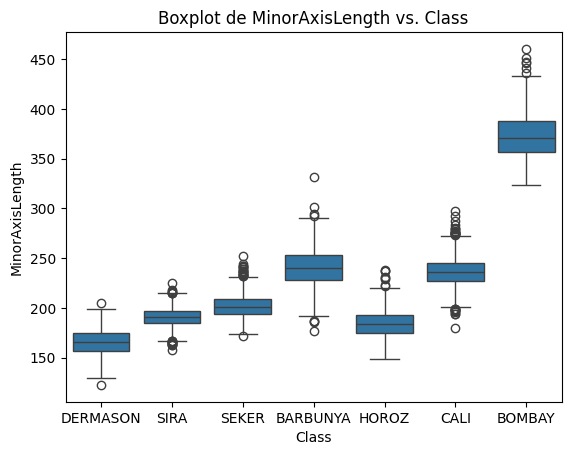

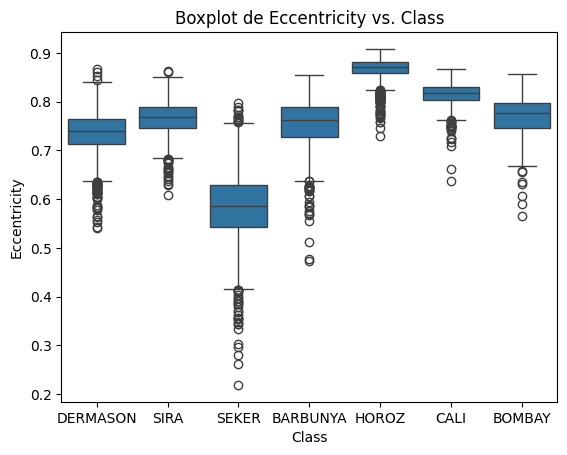

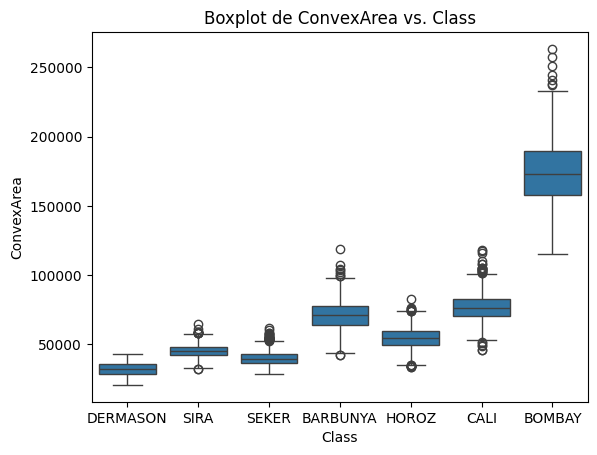

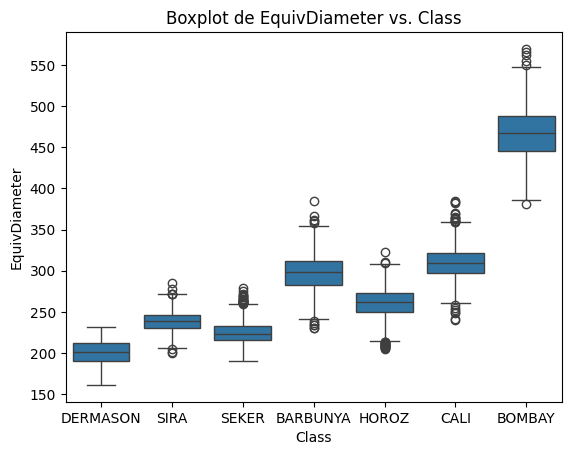

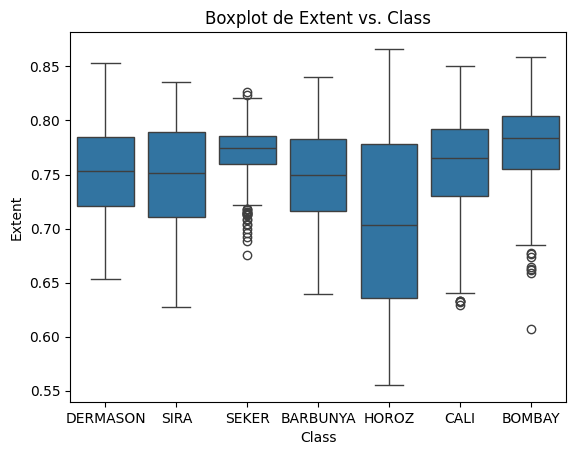

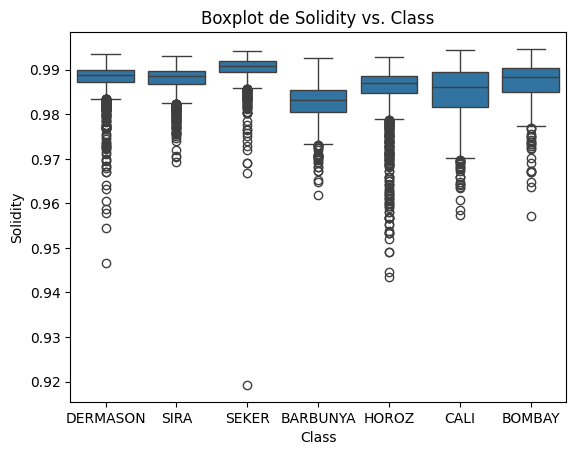

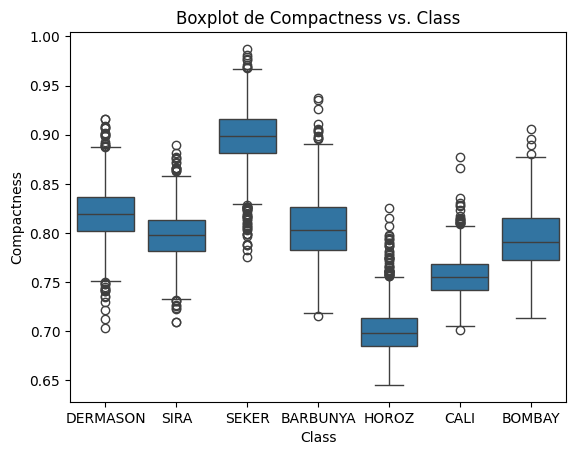

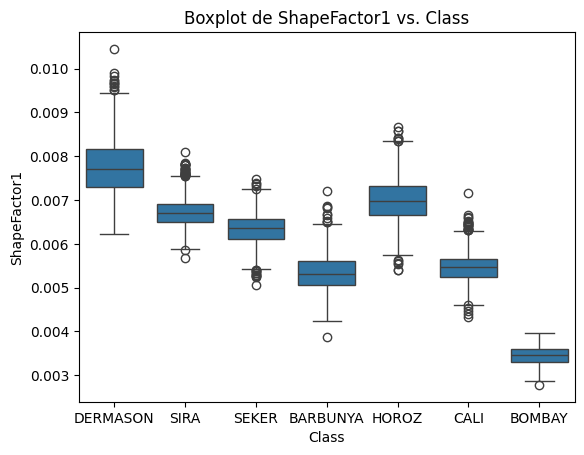

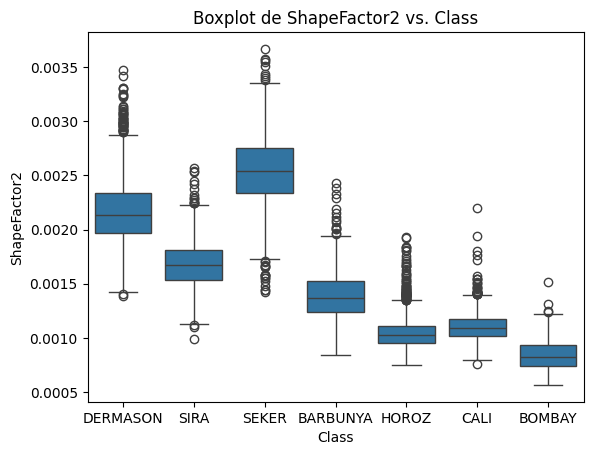

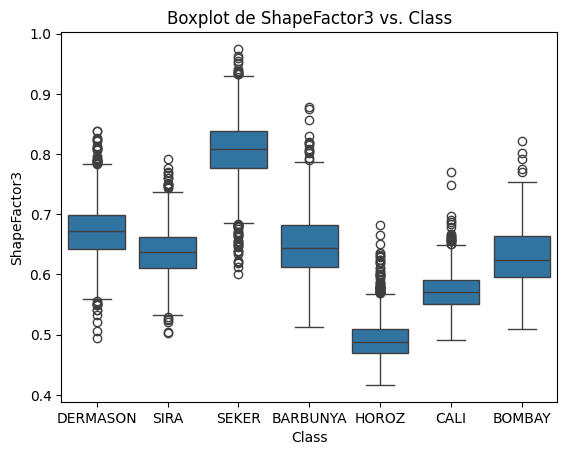

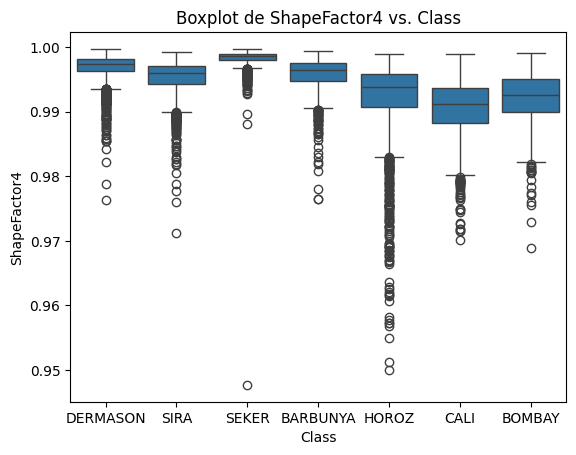

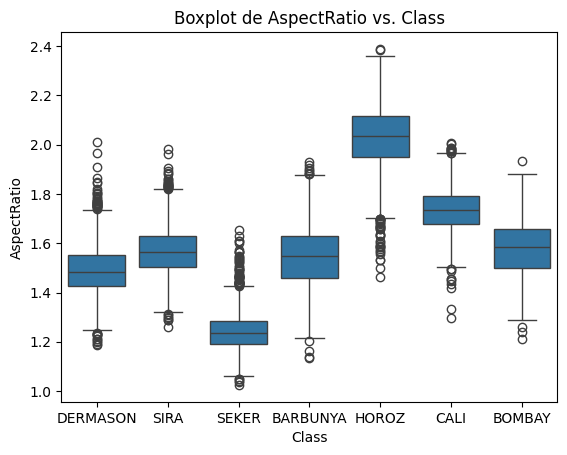

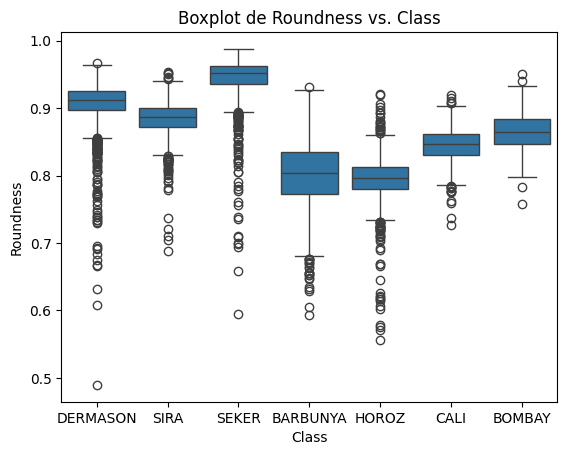

In [44]:
plt.figure(figsize=(6, 4))

for column in X_train.describe().columns[:]:
    if column != 'Class':
        sns.boxplot(x=y_train, y=column, data=X_train)
        plt.title(f'Boxplot de {column} vs. Class')
        plt.ylabel(column)
        plt.show()

Text(0.5, 1.0, 'Class Distribution')

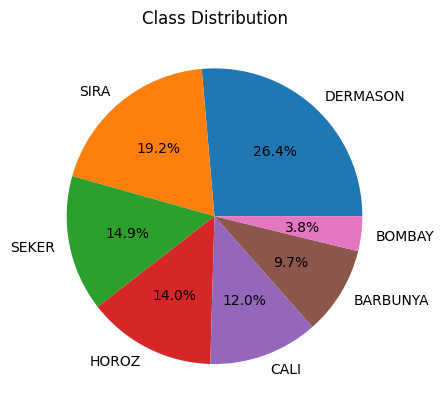

In [46]:
rain_today_counts = y_train.value_counts()

plt.pie(rain_today_counts, labels=rain_today_counts.index, autopct='%1.1f%%')

plt.title('Class Distribution')


Vemos que estan desbalanceadas las clases, luego vamos a balancearlas con un oversampler

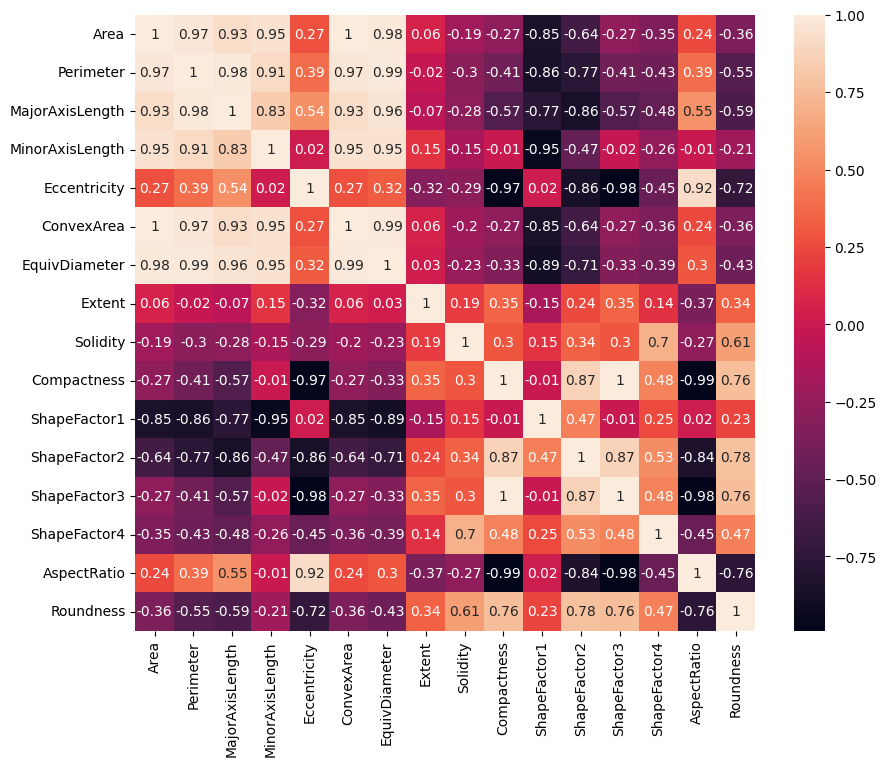

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr().select_dtypes(include=[np.number]).round(2), annot=True)

plt.show()

Podemos ver que Area y ConvexArea, ShapeFactor3 y Compactness,EquivDiameter y Perimeter y AspectRatio y Compactness tienen mucha correlacion, asi que para reducir el ruido, vamos a eliminar las siguientes variables: ConvexArea, ShapeFactor3 y Compactness, EquivDiameter

In [49]:
X_red_train = X_train.drop(columns= ["ShapeFactor3","Compactness","ConvexArea","EquivDiameter"])
X_red_test = X_test.drop(columns= ["ShapeFactor3","Compactness","ConvexArea","EquivDiameter"])

In [13]:
def numericas_categoricas(df2):
  '''Divide el dataframe en variables numéricas
  y categóricas'''
  numerical = []
  categorical = []
  for columna in df2.columns:
    if df2[columna].dtype in ['float64','int64']:
      numerical.append(columna)
    if df2[columna].dtype == 'object':
      categorical.append(columna)
  return numerical

In [50]:
numerical = numericas_categoricas(X_red_train)

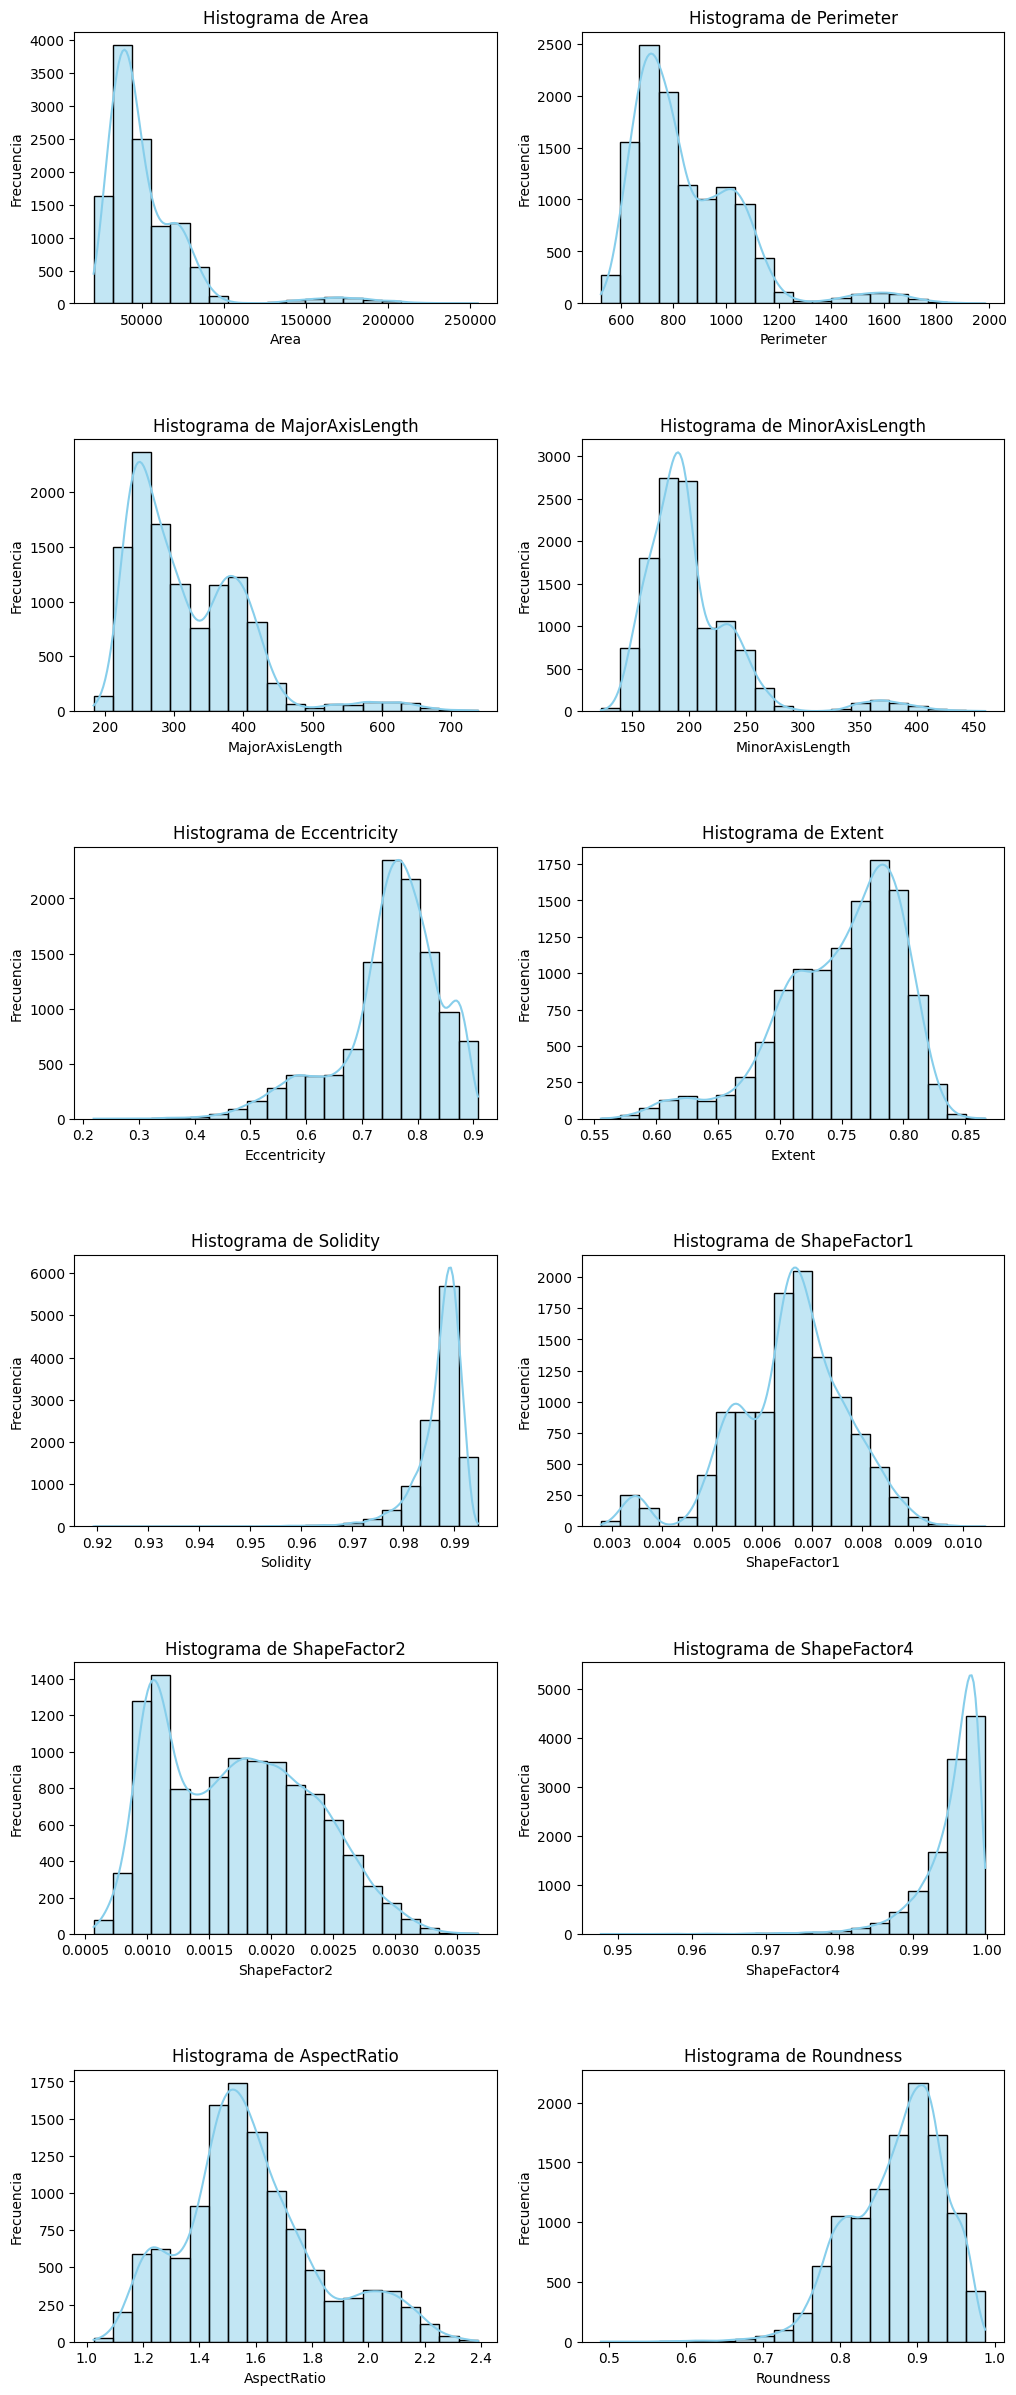

In [51]:
def plot_histogramas(df, numerical):
    num_cols = len(numerical)
    num_rows = (num_cols // 2) + (1 if num_cols % 2 != 0 else 0)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(numerical):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        sns.histplot(df[column], bins=20, kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Histograma de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')

    # Eliminar el último subplot si hay un número impar de columnas
    if num_cols % 2 != 0:
        fig.delaxes(axes[num_rows-1, 1])

    plt.show()

# Uso de la función
plot_histogramas(X_red_train, numerical)

No se observa nada extraño de estos histogramas

Hacemos un oversampler para poder sacar concluciones certeras a partir del accuracy

In [52]:
ros = RandomOverSampler(random_state=42)

# Aplicamos el algoritmo
X_res, y_res = ros.fit_resample(X_red_train, y_train)

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_red_test)

Pasamos la variable a predecir como labelencoding para que entre al modelo

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

target_encoded = le.fit_transform(y_res)
test_encoded = le.transform(y_test)

Aca implementamos el modelo, le añadimos dropout para evitar el overfitting, tiene un earlystopping para que pare cuando le parezca adecuado, y una activacion softmax para la clasificacion

In [58]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    # Capa de entrada
    layers.Dense(64, activation='relu', input_shape=(12,)),
    layers.Dropout(0.2),

    # Capas ocultas ocultas
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    # Capa de salida
    layers.Dense(7, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callback para EarlyStopping (opcional)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

# Entrenar el modelo
history = model.fit(X_scaled, target_encoded, epochs=120, batch_size=32, validation_split = 0.1, callbacks=[early_stopping])

# Evaluar el modelo
model.evaluate(X_test_scaled, test_encoded)

Epoch 1/120
601/601 [==============================] - 3s 4ms/step - loss: 0.3475 - accuracy: 0.8794 - val_loss: 0.3657 - val_accuracy: 0.8666
Epoch 2/120
601/601 [==============================] - 2s 3ms/step - loss: 0.2130 - accuracy: 0.9254 - val_loss: 0.2843 - val_accuracy: 0.8938
Epoch 3/120
601/601 [==============================] - 2s 3ms/step - loss: 0.1951 - accuracy: 0.9333 - val_loss: 0.2052 - val_accuracy: 0.9190
Epoch 4/120
601/601 [==============================] - 3s 5ms/step - loss: 0.1901 - accuracy: 0.9336 - val_loss: 0.1666 - val_accuracy: 0.9406
Epoch 5/120
601/601 [==============================] - 3s 5ms/step - loss: 0.1819 - accuracy: 0.9356 - val_loss: 0.2158 - val_accuracy: 0.9228
Epoch 6/120
601/601 [==============================] - 2s 3ms/step - loss: 0.1788 - accuracy: 0.9352 - val_loss: 0.2442 - val_accuracy: 0.9073
Epoch 7/120
601/601 [==============================] - 2s 3ms/step - loss: 0.1728 - accuracy: 0.9393 - val_loss: 0.2401 - val_accuracy: 0.9130

[0.19893966615200043, 0.93388831615448]

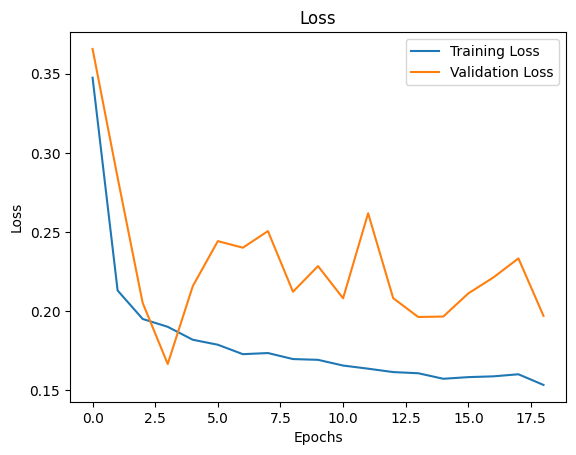

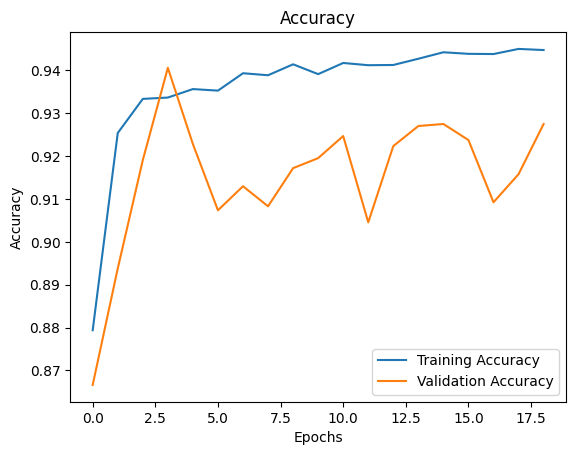

In [59]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot loss
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()